***Quantum Fourier Transform on 4 and 5 qubits***

Name: A D Mahit Nandan

Roll No: 211AI001

Importing Necesary Libraries

In [35]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

The qft_rotations function takes two arguments 

1)The circuit on which qft have to applied

2)The number of qubits in circuit

In [37]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)



swap_registers in used to add the necessary swap gated after qft_rotations

qft is the function which call qft_rotations and swap_registers to finally fourier traansform the circuit

In [39]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit



First we create a circuit with 4 qubits

Then we encode the state 9 in the cicuit by applying not gate on qubit 0 and 3

Therefore input qubit is changed from |000> to |1001>

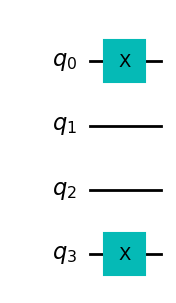

In [41]:
# Create the circuit
qc = QuantumCircuit(4)

# Encode the state 9
qc.x(0)
qc.x(3)
qc.draw()

Now we plot the encoded state of 9 on the bloch spheres

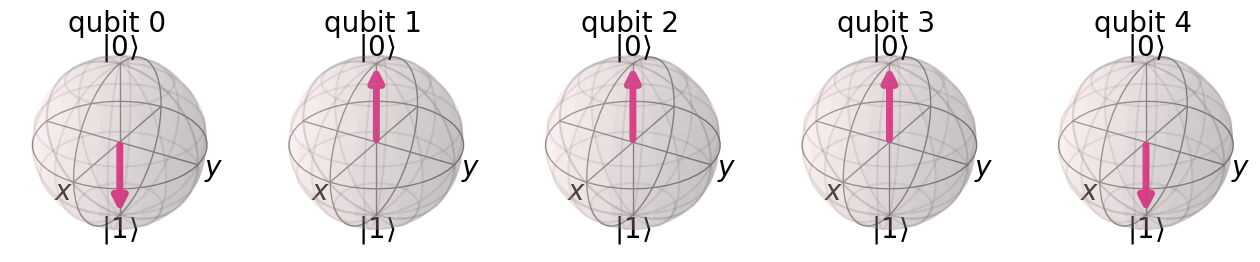

In [61]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

As we can see qubit 3 and 0 are in state |1> while qubit 1 and 2 are in state |0>

Now we apply the quantum fourier transform on our circuit using the function qft and plot the circuit

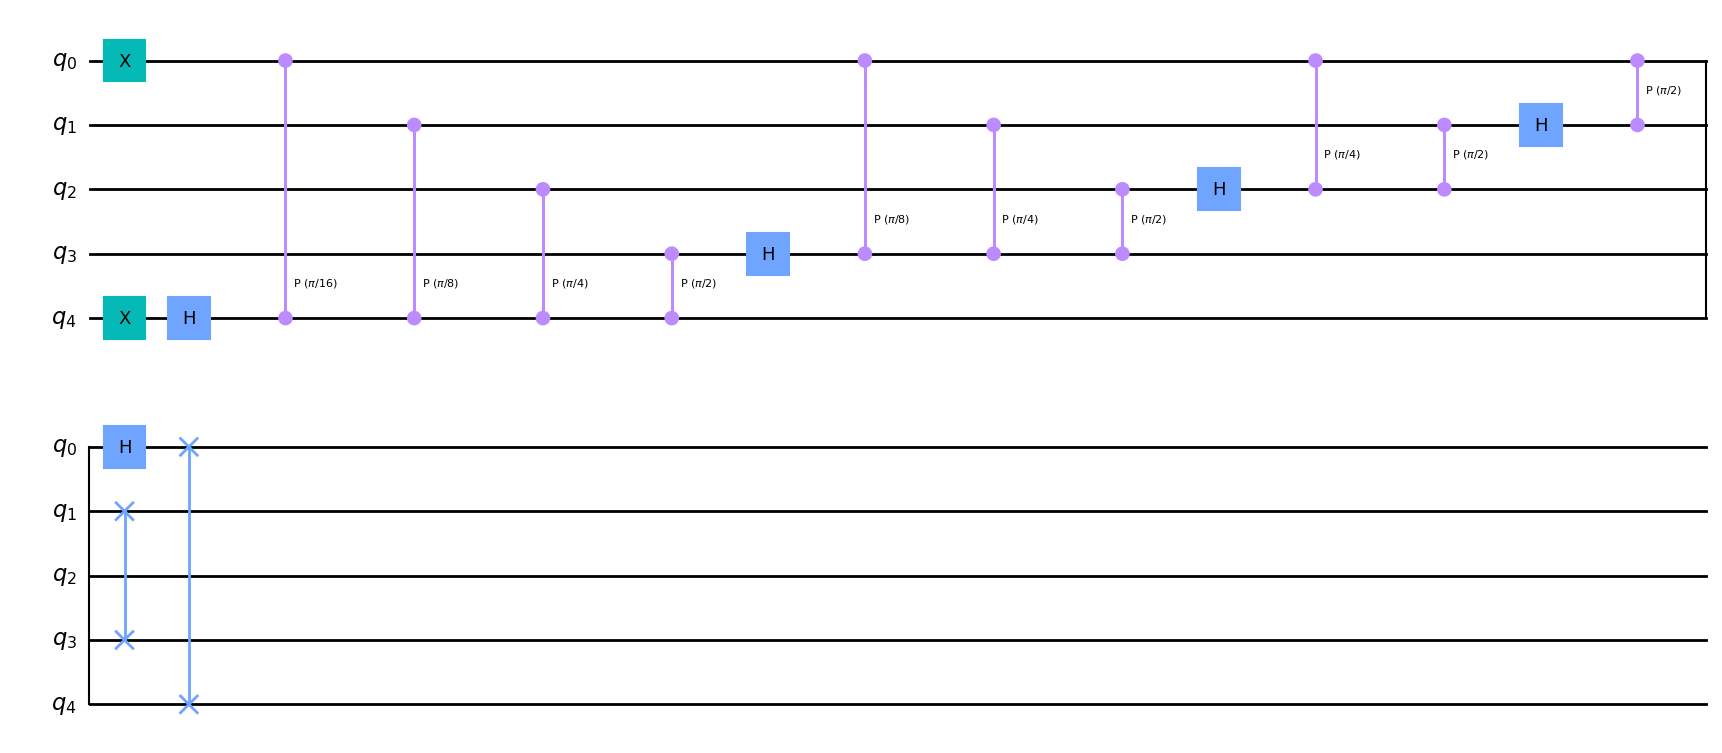

In [62]:
qft(qc,5)
qc.draw()

The states of each qubit after applying quantum fourier transform on them is shown below 

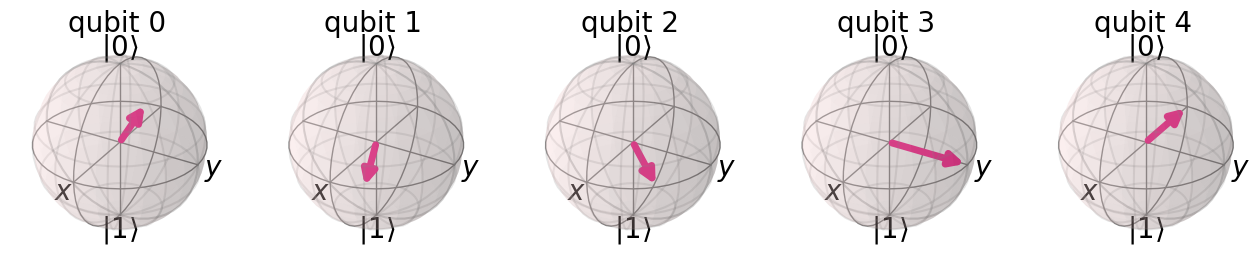

In [63]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

If we tried running the circuit on a real device, the results would be completely random, since all qubits are in equal superposition of |0> and |1>. 

We can instead create the state $|\widetilde{9}\rangle$ ,run the QFT in reverse(inverse qft), and verify the output is the state $|9\rangle$ as expected. 



Function for inverse qft

In [46]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

Now we should duplicate the qubit states of each qubit as it was obtained after applying qft

After replicating the finished circuit we now pass the this circuit into inverse_qft which can be used to determine the initial state of the circuit. If it is |9> then the output is verified.

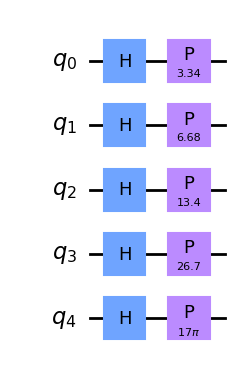

In [64]:
nqubits = 5
number = 17
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/16,0)
qc.p(number*pi/8,1)
qc.p(number*pi/4,2)
qc.p(number*pi/2,3)
qc.p(number*pi,4)
qc.draw()

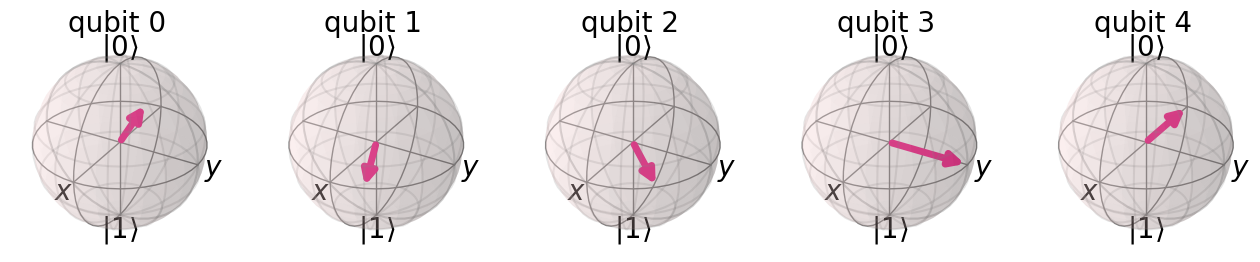

In [65]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

After plotting the new circuit on the bloch sphere we can notice it is identical to the bloch sphere on which qft was applied initially

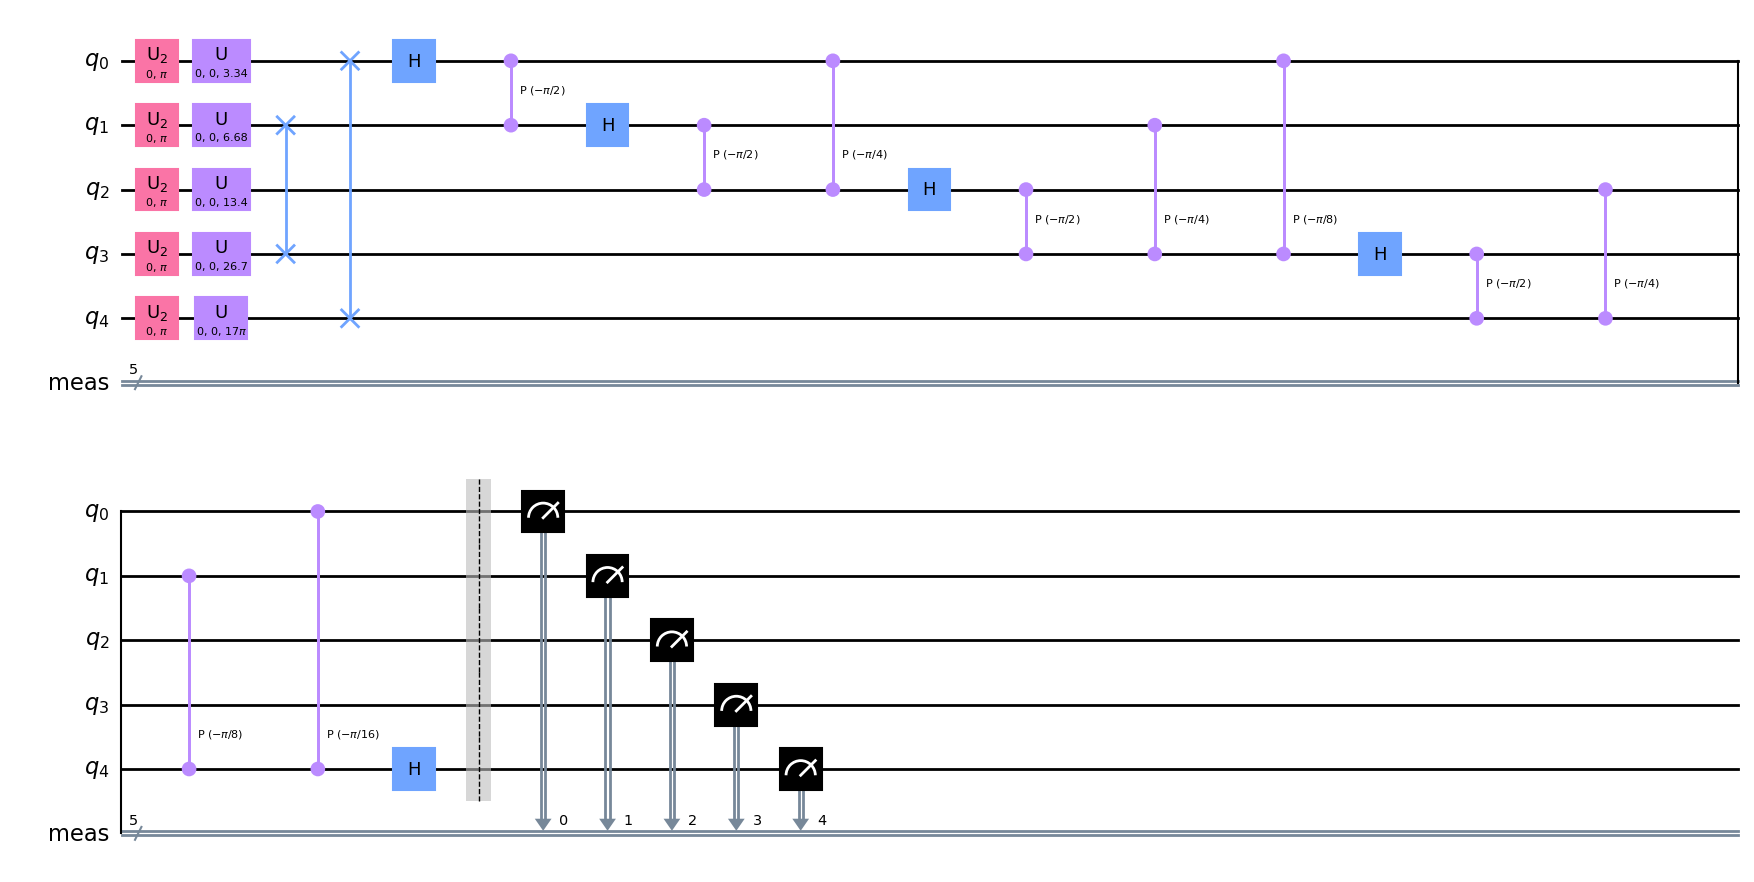

In [66]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

In [31]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

/tmp/ipykernel_61/1715272355.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibmq_lima


In [33]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


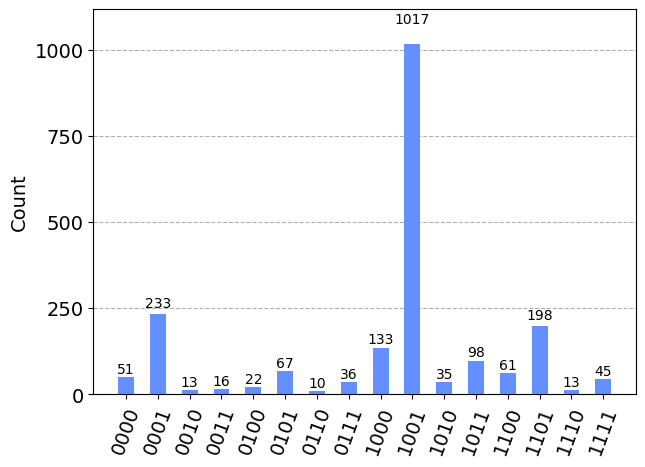

In [34]:
counts = job.result().get_counts()
plot_histogram(counts)

We can notice the after plotting the histogram our qft operation can be verifed as the inverse_qft of the qubits states gives the higest probablity for |1001> which was the initial input we had taken

***QFT on 5 qubits***

We take a initial ecnoded state of 17 that is |10001>

There for we have to apply not gate on qubit 0 and 5

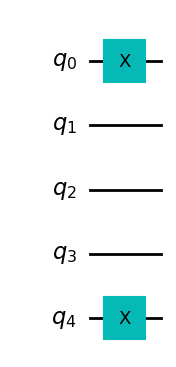

In [60]:
# Create the circuit
qc = QuantumCircuit(5)

# Encode the state 9
qc.x(0)
qc.x(4)
qc.draw()

Now we plot the encoded state of 17 on the bloch spheres

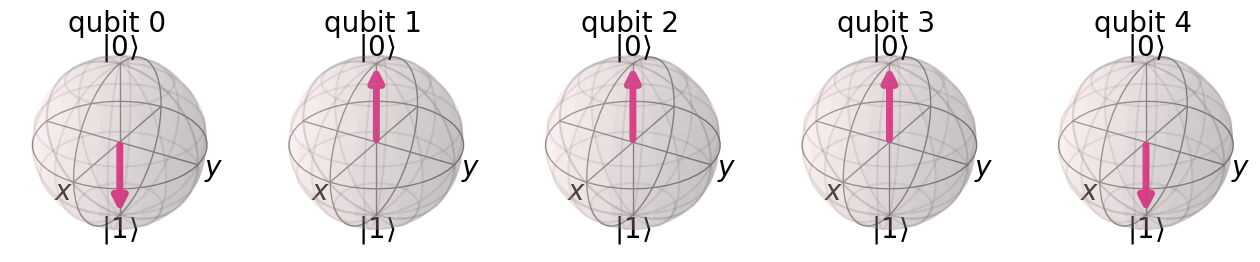

In [61]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

As we can see qubit 4 and 0 are in state |1> while qubit 1,2 and 3 are in state |0>

Now we apply the quantum fourier transform on our circuit using the function qft and plot the circuit

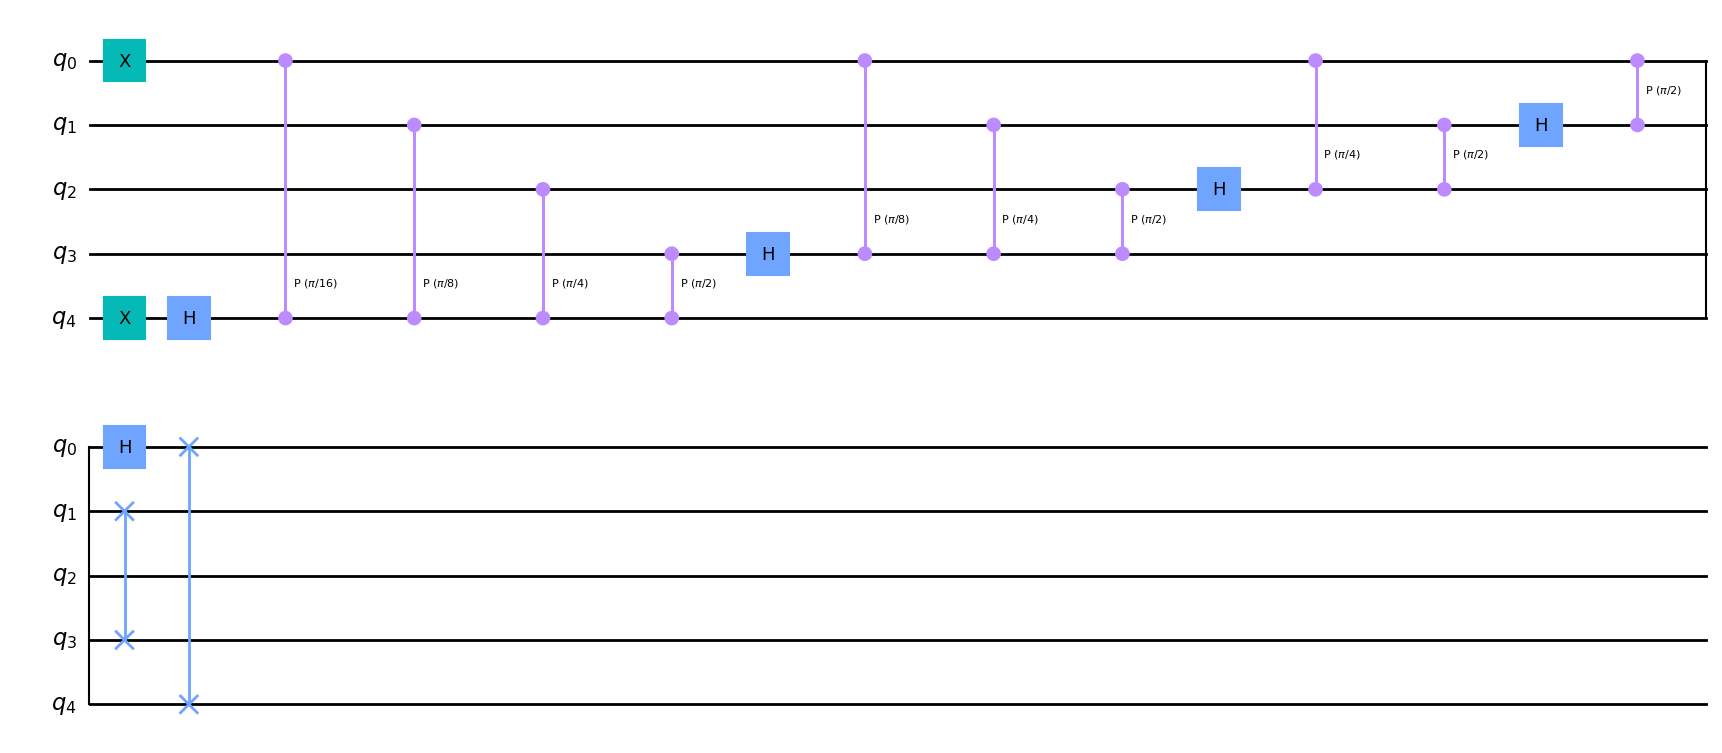

In [62]:
qft(qc,5)
qc.draw()

The states of each qubit after applying quantum fourier transform on them is shown below 

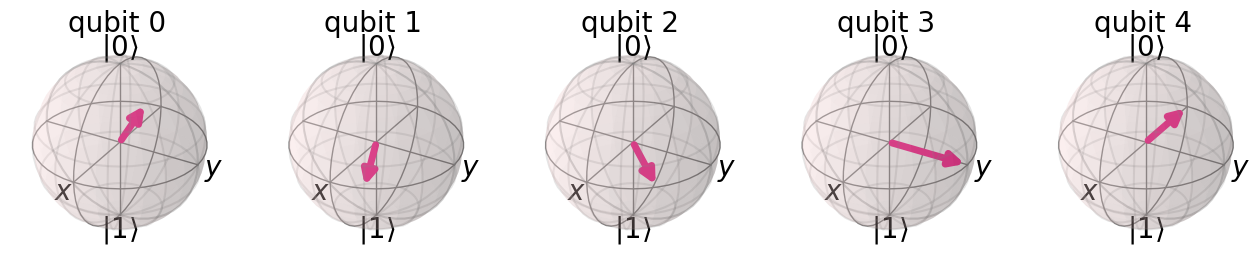

In [63]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

Now we should duplicate the qubit states of each qubit as it was obtained after applying qft

After replicating the finished circuit we now pass the this circuit into inverse_qft which can be used to determine the initial state of the circuit. If it is |9> then the output is verified.

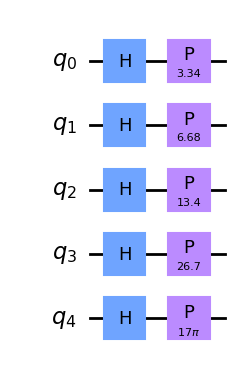

In [64]:
nqubits = 5
number = 17
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/16,0)
qc.p(number*pi/8,1)
qc.p(number*pi/4,2)
qc.p(number*pi/2,3)
qc.p(number*pi,4)
qc.draw()

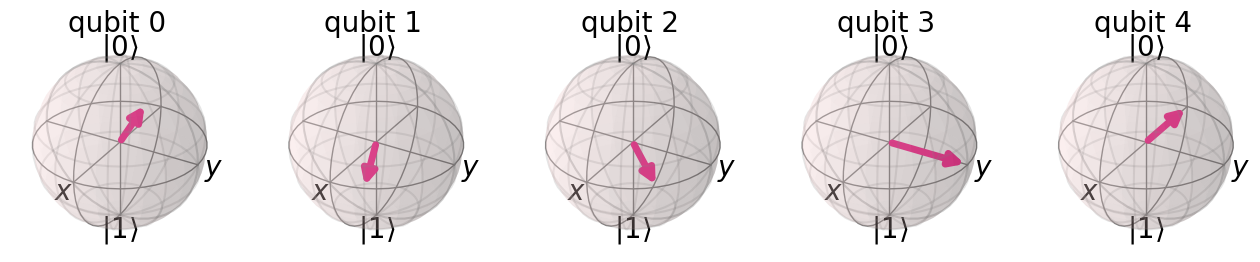

In [65]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

After plotting the new circuit on the bloch sphere we can notice it is identical to the bloch sphere on which qft was applied initially

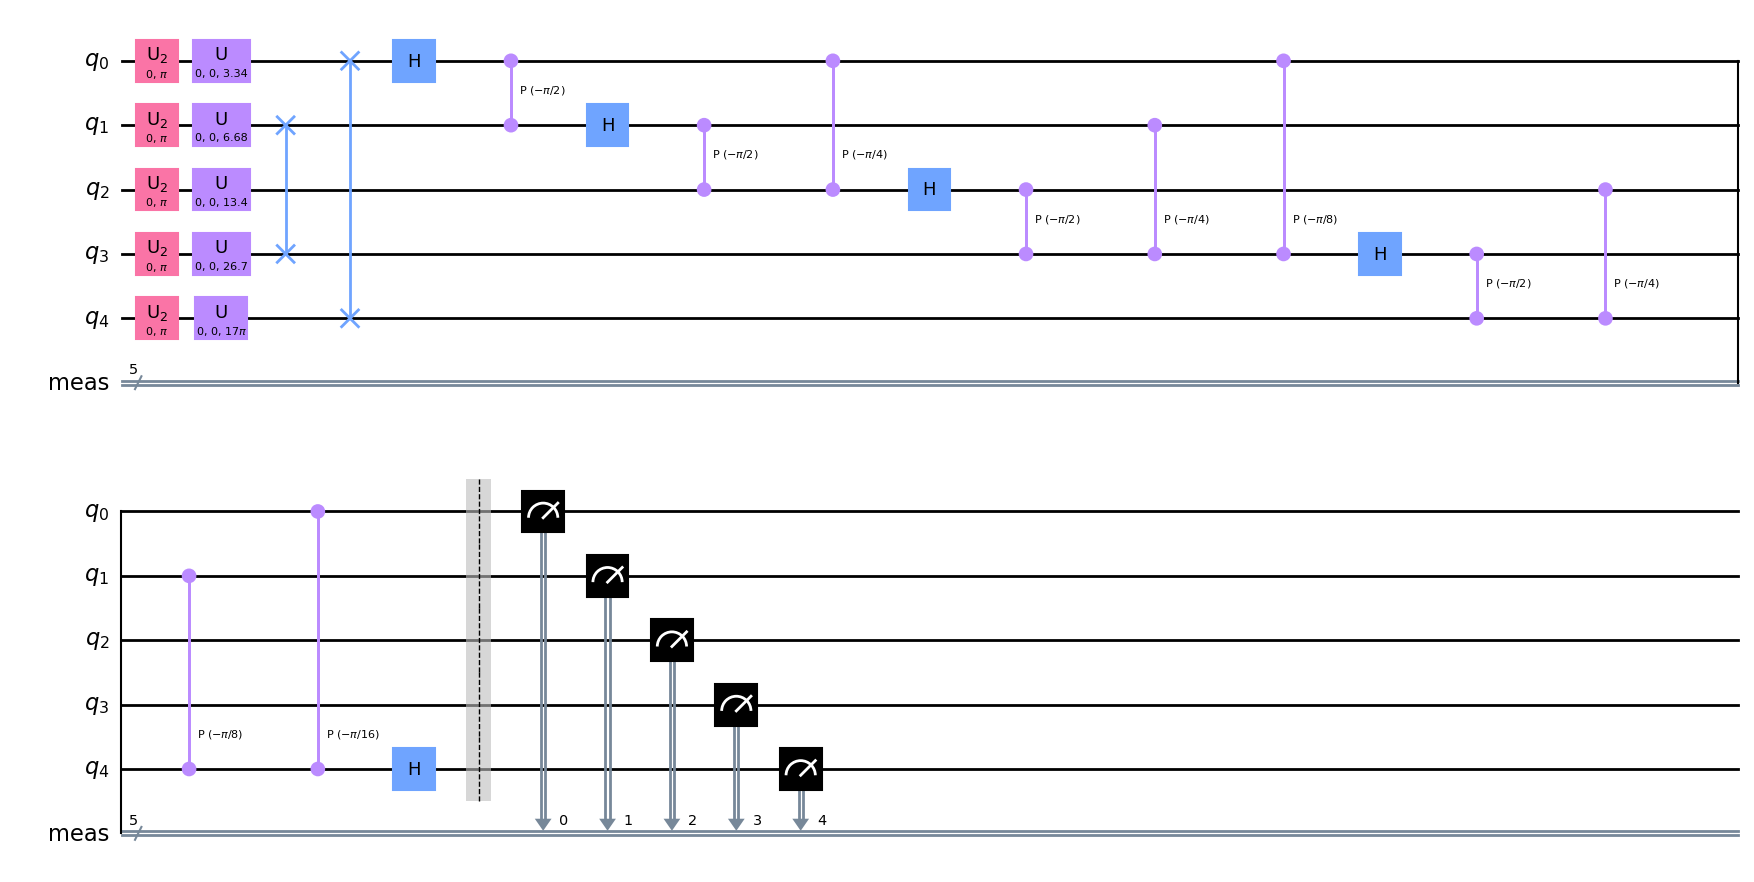

In [66]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

In [67]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2023-05-03 16:29:43,275: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima


In [68]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


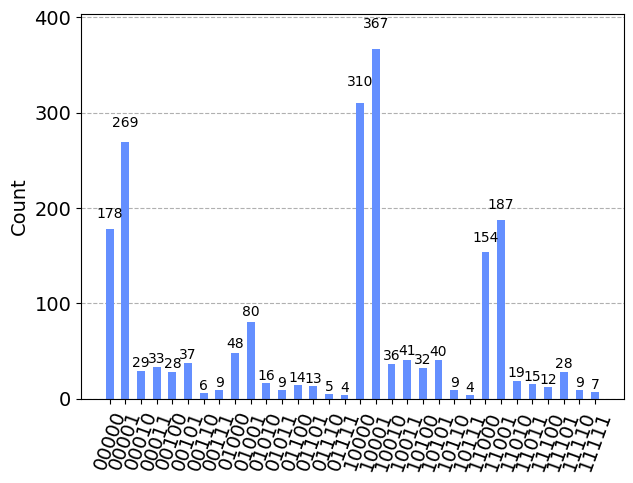

In [69]:
counts = job.result().get_counts()
plot_histogram(counts)

We can notice the after plotting the histogram our qft operation can be verifed as the inverse_qft of the qubits states gives the higest probablity for |10001> which was the initial input we had taken